In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import mnist

# 1. Data Load

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


5


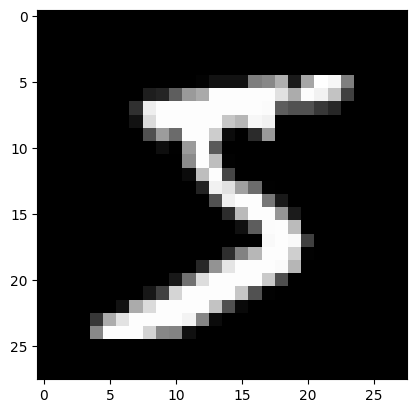

In [4]:
plt.imshow(X_train[0],cmap='gray')
print(y_train[0])

3


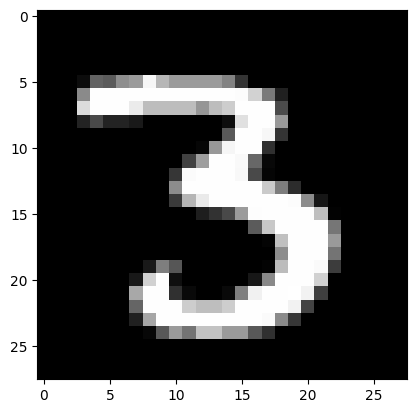

In [5]:
plt.imshow(X_train[12],cmap='gray')
print(y_train[12])

In [6]:
y_val = np.unique(y_train)
print('class의 종류: ', y_val)
print('class의 수:', len(y_val))

class의 종류:  [0 1 2 3 4 5 6 7 8 9]
class의 수: 10


In [7]:
mnist_model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    Flatten(),
    Dense(units=512,activation='relu'),
    Dense(units=10,activation='softmax')
])

In [8]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 512)               2769408   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 2,774,858
Trainable params: 2,774,858
Non-trainable params: 0
______________________________________________

In [9]:
mnist_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [10]:
Xsc_train = X_train/255
Xsc_test = X_test/255

In [11]:
ep = 20
batch = 512
val_ratio = 0.2

mnist_result = mnist_model.fit(Xsc_train, y_train,
                               epochs=ep,
                               batch_size=batch,
                               validation_split=val_ratio)

Epoch 1/20
94/94 [==============================] - 54s 558ms/step - loss: 0.3444 - acc: 0.9032 - val_loss: 0.1276 - val_acc: 0.9638
Epoch 2/20
94/94 [==============================] - 47s 502ms/step - loss: 0.0996 - acc: 0.9715 - val_loss: 0.0818 - val_acc: 0.9766
Epoch 3/20
94/94 [==============================] - 49s 523ms/step - loss: 0.0623 - acc: 0.9820 - val_loss: 0.0653 - val_acc: 0.9817
Epoch 4/20
94/94 [==============================] - 44s 472ms/step - loss: 0.0436 - acc: 0.9879 - val_loss: 0.0548 - val_acc: 0.9837
Epoch 5/20
94/94 [==============================] - 45s 484ms/step - loss: 0.0340 - acc: 0.9900 - val_loss: 0.0630 - val_acc: 0.9808
Epoch 6/20
94/94 [==============================] - 47s 502ms/step - loss: 0.0288 - acc: 0.9914 - val_loss: 0.0533 - val_acc: 0.9841
Epoch 7/20
94/94 [==============================] - 44s 473ms/step - loss: 0.0203 - acc: 0.9946 - val_loss: 0.0508 - val_acc: 0.9851
Epoch 8/20
94/94 [==============================] - 47s 497ms/step - 

# 3. model 검증

In [12]:
mnist_model.evaluate(Xsc_test,y_test)

313/313 [==============================] - 6s 19ms/step - loss: 0.0457 - acc: 0.9867


[0.04571456089615822, 0.9866999983787537]

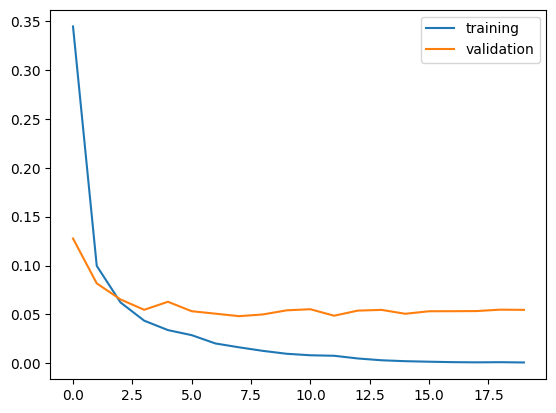

In [13]:
plt.plot(mnist_result.history['loss'])
plt.plot(mnist_result.history['val_loss'])
plt.legend(['training','validation'])

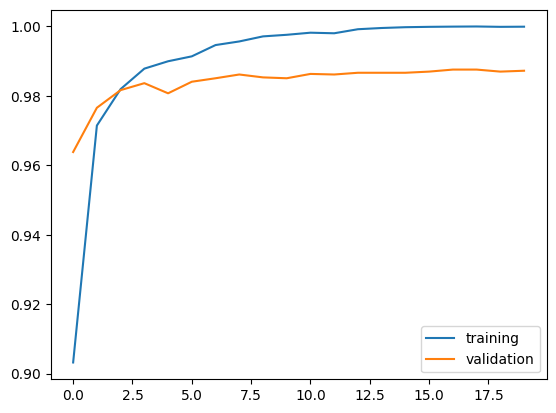

In [14]:
plt.plot(mnist_result.history['acc'])
plt.plot(mnist_result.history['val_acc'])
plt.legend(['training','validation'])

In [15]:
pred_proba = mnist_model.predict(Xsc_test)

313/313 [==============================] - 4s 11ms/step


In [16]:
pred = np.argmax(pred_proba,axis=1)

In [17]:
wrong_ind = np.argwhere(y_test != pred)

In [18]:
print('the number of wrong classified data: ', len(wrong_ind))

the number of wrong classified data:  133


In [19]:
wrong_ind = wrong_ind.ravel()

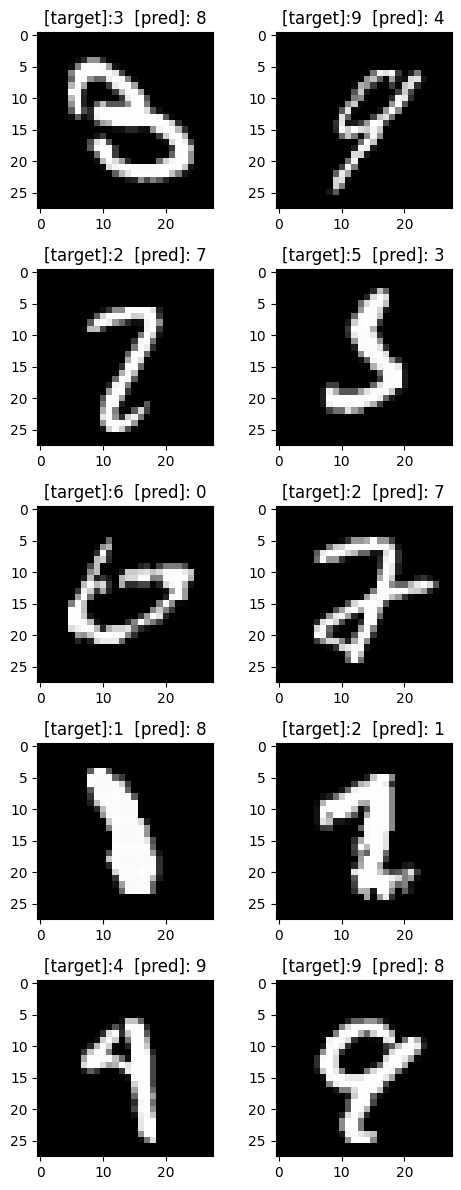

In [20]:
j = 1
plt.figure(figsize=(5,12))
for i in wrong_ind[:10]:
  plt.subplot(5,2,j)
  plt.imshow(X_test[i],cmap='gray')
  plt.title('[target]:'+ str(y_test[i])+'  [pred]: '+ str(pred[i]))
  j=j+1

plt.tight_layout()